<a href="https://colab.research.google.com/github/vicentegilso/textpreprocesing/blob/main/SKLearn_Spam_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SKLearn Spam Classification

## Download the ENRON Mail Dataset 📩

For more information about the dataset check this [webapage](https://www.cs.cmu.edu/~enron/)

In [ ]:
%%shell
wget http://www.aueb.gr/users/ion/data/enron-spam/preprocessed/enron1.tar.gz
tar -zxf enron1.tar.gz

--2021-07-01 13:29:21--  http://www.aueb.gr/users/ion/data/enron-spam/preprocessed/enron1.tar.gz
Resolving www.aueb.gr (www.aueb.gr)... 195.251.255.156
Connecting to www.aueb.gr (www.aueb.gr)|195.251.255.156|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://www2.aueb.gr/users/ion/data/enron-spam/preprocessed/enron1.tar.gz [following]
--2021-07-01 13:29:22--  http://www2.aueb.gr/users/ion/data/enron-spam/preprocessed/enron1.tar.gz
Resolving www2.aueb.gr (www2.aueb.gr)... 195.251.255.138
Connecting to www2.aueb.gr (www2.aueb.gr)|195.251.255.138|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1802573 (1.7M) [application/x-gzip]
Saving to: ‘enron1.tar.gz.1’

enron1.tar.gz.1     100%[===================>]   1.72M  1.14MB/s    in 1.5s    

2021-07-01 13:29:24 (1.14 MB/s) - ‘enron1.tar.gz.1’ saved [1802573/1802573]



In [ ]:
import random
from pathlib import Path

## Read and visualize data samples 📖

In [ ]:
data_path = Path('enron1')
ham_path = data_path / 'ham'
spam_path = data_path / 'spam'

ham_files = list(ham_path.iterdir())
spam_files = list(spam_path.iterdir())

In [ ]:
random.sample(ham_files, 5)

[PosixPath('enron1/ham/2212.2000-09-12.farmer.ham.txt'),
 PosixPath('enron1/ham/2482.2000-10-09.farmer.ham.txt'),
 PosixPath('enron1/ham/0876.2000-04-06.farmer.ham.txt'),
 PosixPath('enron1/ham/2409.2000-10-02.farmer.ham.txt'),
 PosixPath('enron1/ham/2814.2000-11-09.farmer.ham.txt')]

In [ ]:
random.sample(spam_files, 5)

[PosixPath('enron1/spam/5101.2005-08-29.GP.spam.txt'),
 PosixPath('enron1/spam/3184.2004-12-15.GP.spam.txt'),
 PosixPath('enron1/spam/3789.2005-02-10.GP.spam.txt'),
 PosixPath('enron1/spam/2490.2004-10-13.GP.spam.txt'),
 PosixPath('enron1/spam/5128.2005-09-02.GP.spam.txt')]

In [ ]:
print("====== HAM =======")
print(random.choice(ham_files).read_text())
print("=" * 80)

print("====== SPAM =======")
print(random.choice(spam_files).read_text())
print("=" * 80)

====== HAM =======
Subject: re : new production - sitara deals needed
vance ,
deal # 348616 has been created and entered in sitara for samson lone star
limited . meter # 9847 is not yet available in sitara and i am awaiting
additional information from you on hesco . thanks .
bob
vance l taylor
07 / 28 / 2000 01 : 24 pm
to : robert cotten / hou / ect @ ect
cc : lisa hesse / hou / ect @ ect , trisha hughes / hou / ect @ ect , heidi
withers / hou / ect @ ect , hillary mack / corp / enron @ enron , susan smith / hou / ect @ ect ,
donald p reinhardt / hou / ect @ ect , melissa graves / hou / ect @ ect
subject : new production - sitara deals needed
bob ,
the following production is now on - line and a ticket should be created and
entered into sitara based on the following :
counterparty meter volumes price period
hesco gathering oil co 9835 600 mmbtu / d 96 % gas daily less $ 0 . 14
6 / 10 - 7 / 31
samson lone star limited 9845 3000 mmbtu / d 100 % gas daily less $ 0 . 10 7 / 21 -
7 / 31
win


## Generate train test sets

In [ ]:
all_files = ham_files + spam_files
labels = [0] * len(ham_files) + [1] * len(spam_files)
all_texts = [o.read_text(encoding='latin-1') for o in all_files]

In [ ]:
from sklearn.model_selection import train_test_split
splits = train_test_split(all_texts, labels, random_state=42, train_size=.8)
train_texts, test_texts, train_labels, test_labels = splits

print("Train samples:", len(train_texts))
print("Test samples:", len(test_texts))

Train samples: 4137
Test samples: 1035


## Vectorize the sentences 🔢

We'll do this in three steps using the bag-of-words and Term Frequency - inverse document frequency (TF-iDF) model:

1. Count how many times does a word occur in each message (Known as term frequency)
2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)
3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

### Bag of words (CountVectorizer)

![](https://www.programmersought.com/images/947/0acb9279d17a1631bcfb154583cca443.JPEG)

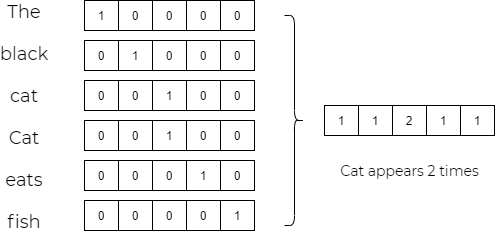

With [Scikit-learn Count Vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) we can perform all the preprocessing techniques we have just seen in the previous notebook with a single step.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer.fit(train_texts)

print("Vocabulary length:", len(count_vectorizer.vocabulary_))

Vocabulary length: 43746


In [ ]:
import numpy as np

train_bow = count_vectorizer.transform(train_texts)
test_bow = count_vectorizer.transform(test_texts)

print('Shape of Sparse Matrix:', train_bow.shape)
print('Amount of non-zero occurences ', train_bow.nnz, 'out of', np.prod(train_bow.shape))

Shape of Sparse Matrix: (4137, 43746)
Amount of non-zero occurences  272144 out of 180977202


In [ ]:
rand_idx = random.randint(0, train_bow.shape[0])
train_bow[rand_idx].toarray()

array([[0, 1, 0, ..., 0, 0, 0]])

After the counting, the term weighting and normalization can be done with TF-IDF, using scikit-learn's [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer).

### TF-idf

> TF-IDF stands for term frequency-inverse document frequency, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus.

- **Term Frequency (TF)**, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length

$ TF(t) = \frac{Number\ of\ times\ term\ t\ appears\ in\ a\ document}{Total\ number\ of\ terms\ in\ the\ document} $

- **Inverse Document Frequency (IDF)***, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following:

$ IDF(t) = log \frac{Total\ number\ of\ documents}{Number\ of\ documents\ with\ term\ t} $

![](https://miro.medium.com/max/3604/1*qQgnyPLDIkUmeZKN2_ZWbQ.png)


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer()
tfidf.fit(train_bow)

tfidf_train = tfidf.transform(train_bow)
tfidf_test = tfidf.transform(test_bow)

## Train a model

![](http://media5.datahacker.rs/2021/01/44.jpg)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(tfidf_train, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

![](https://excelrcom.b-cdn.net/assets/admin/ckfinder/userfiles/images/2020%20uploads/11/1.PNG)

## Evaluate the model 🎯


Metrics are numbers that describe how good your model is. In this particular case, within binary classification framework,  we only just have two classes: positive and negative. 

Typically the metrics values will range from 0 to 1 where higher is better.

To understand the evaluation metrics is really important to know and feel comfortable with the following terminology:

- True Positive (TP)
- True Negative (TN)
- False Positive (FP)
- False Negative (FN)

For example, if the condition is a disease, “true positive” means “correctly diagnosed as diseased”, “false positive” means “incorrectly diagnosed as diseased”, “true negative” means “correctly diagnosed as not diseased”, and “false negative” means “incorrectly diagnosed as not diseased”. Thus, if a test's sensitivity is 98% and its specificity is 92%, its rate of false negatives is 2% and its rate of false positives is 8%. [Reference](https://en.wikipedia.org/wiki/Sensitivity_and_specificity)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/Sensitivity_and_specificity.svg/342px-Sensitivity_and_specificity.svg.png)

In my way of thinking, a single metric to maximize is better than having multiple metrics. Using a single metric allows me to easily compare models, thus, iterate faster. 

In the following lines, I explain which metrics may be useful when dealing with a binary classification along with its associated problems.

### Recall

$Recall = \frac{TP}{TP + FN}$

A model with a perfect recall is the one that does not have any False Negative. But with this metric, we have the risk of not taking into account the False Positives.

### Precision

$Precision = \frac{TP}{TP + FP}$

Intuitively speaking, if we have a precise model when it catches all True Positive examples and does not make any False Positive prediction. Here again, we are not taking into account a possible source of errors, the False Negatives.

### F1-Score

As a rule of thumb, if the cost of having False Negative is high (for example, incorrectly diagnosed as healthy), we want to increase the model recall.

On the other hand, if the cost of having False Positive (marking a video as illegal when it is not) is high, then we want to increase the model precision.

F1-score can help us keep a balance between those metrics.

This metric is a kind of a weighted average between the recall and the precision. 

$F1 Score = 2 \times \frac{precision \cdot recall}{precision + recall}$ 

### AUROC

This metric compares the Recall vs the False Positive Rate

![](https://glassboxmedicine.files.wordpress.com/2019/02/roc-curve-v2.png?w=576)

Area Under the Receiver Operating Characteristic curve (AUROC).

As more area, we have under the curve, more distance between True Positives and True Negatives.

Although F1 scores seems a good metric for this problem, AUROC is better. For F1 score to be good (close to 1), both precision and recall should be close to 1 as well. In consequence, when dealing with an imbalance between Positive and Negative samples, we should prioritize F1 in front of AUROC.


In [ ]:
train_predictions = lr.predict(tfidf_train)
test_predictions = lr.predict(tfidf_test)

In [ ]:
from sklearn.metrics import classification_report

print("=== Train ===")
print(classification_report(train_labels, train_predictions))

print("=== Test ===")
print(classification_report(test_labels, test_predictions))

=== Train ===
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2923
           1       0.99      1.00      0.99      1214

    accuracy                           1.00      4137
   macro avg       0.99      1.00      0.99      4137
weighted avg       1.00      1.00      1.00      4137

=== Test ===
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       749
           1       0.96      0.99      0.97       286

    accuracy                           0.98      1035
   macro avg       0.98      0.99      0.98      1035
weighted avg       0.98      0.98      0.98      1035



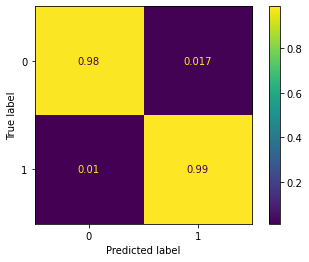

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lr, tfidf_test, test_labels, normalize='true');

In [ ]:
#@markdown ## Inference with your data

email = 'Subject: free course of traiding. Never loose money again $$$!'  #@param {type: "string"}

In [ ]:
spam_prob = lr.predict_proba(tfidf.transform(count_vectorizer.transform([email])))
print(f"Probability of spam is {int(spam_prob[0, 1] * 100)}%")

Probability of spam is 82%
